In [2]:
from openai import OpenAI
import os

api_key = os.getenv("open_ai_secret_key")

# Describe an image

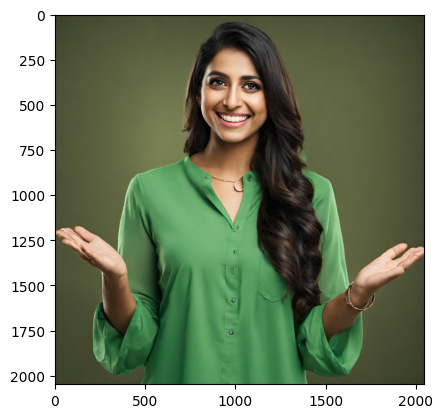

In [21]:
import cv2
from matplotlib import pyplot as plt

image_path = "girl_image_5.jpg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#Examples based on https://platform.openai.com/docs/guides/vision

In [49]:
#thanks to https://platform.openai.com/docs/guides/vision

import base64
import requests



# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "girl_image_5.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Describe this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 400
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

#print(response.json())
print(response.json()['choices'][0]['message']['content'])

The image shows a woman posing with a friendly and approachable expression. She has long, wavy dark hair and is smiling broadly, showing her teeth. Her hands are raised at waist level, palms up, in a gesture that can signify openness, offering, questioning, or comparing two things. She is wearing a buttoned-up, olive green blouse with long sleeves. The background is a textured, solid olive green color, which complements her blouse. The lighting on her face suggests a professional portrait with a focus on making her facial features stand out while casting soft shadows. Her jewelry includes a delicate necklace with a small pendant and a thin bracelet on her right wrist, both of which have a minimalist style. Overall, the image conveys a positive, cheerful mood and seems designed for a professional or commercial context.


# Handwritten Recipe

## Handwritten Recipe by a 9 year old baker. She also wants to help others by publishing a cookbook.
We will use gpt to read the text and autocorrect the typos and spelling mistakes

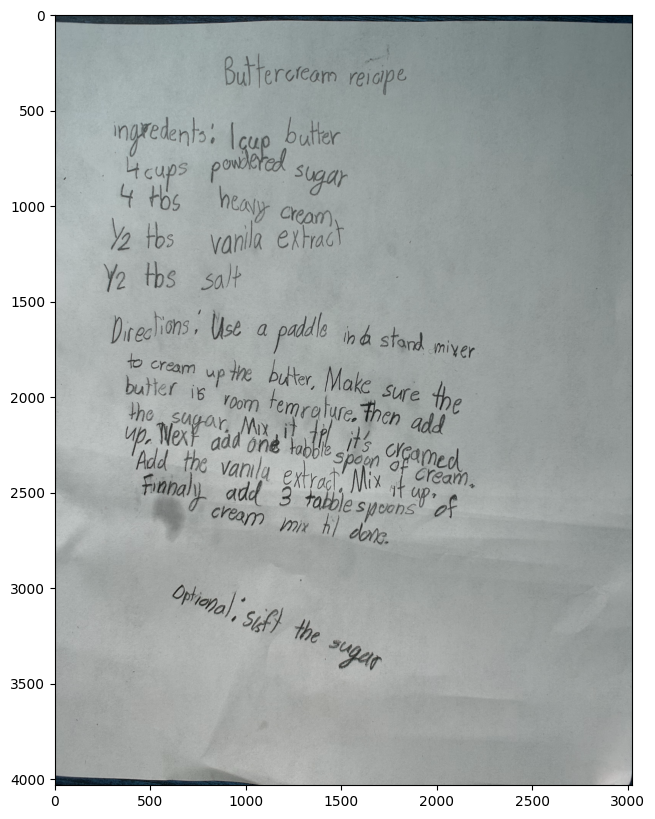

In [48]:
import cv2
from matplotlib import pyplot as plt

image_path = "frosting_recipe.jpeg"
img = cv2.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [29]:
import base64
import requests

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "frosting_recipe.jpeg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Convert the text in the image to well formatted text"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 400
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

#print(response.json())
recipe_text = response.json()['choices'][0]['message']['content']
print(recipe_text)

Buttercream Recipe

Ingredients:
- 1 cup butter
- 4 cups powdered sugar
- 4 tbs heavy cream
- 1/2 tbs vanilla extract
- 1/2 tbs salt

Directions:
Use a paddle in a stand mixer to cream up the butter. Make sure the butter is room temperature. Then add the sugar, Mix it till it's creamed up. Next add one tablespoon of cream. Add the vanilla extract. Mix it up. Finally, add 3 tablespoons of cream. Mix til done.

Optional: Sift the sugar.


### As we can see from the output, gpt has autocorrected typos and spelling mistakes and also formatted in a nice way

# Create a recipe cookbook

## We will store the recipe text in to PDF file

In [ ]:
#!pip install fpdf

In [46]:
from fpdf import FPDF

# Define a class that extends FPDF for your PDF generation
class PDF(FPDF):
    def header(self):
        pass

    def footer(self):
        self.set_y(-15)  # Position at 1.5 cm from bottom
        self.set_font('Arial', 'I', 8)  # Arial italic 8
        # Add a page number
        page_num = self.page_no()
        self.cell(0, 10, f'Page {page_num}', 0, 0, 'C')

# Sample text to store in the PDF
text = recipe_text

# Create a PDF object
pdf = PDF()

# Add a page to the PDF
pdf.add_page()

# Set the font for the PDF: Arial, 12pt
pdf.set_font("Arial", size=12)

# Add the text to the PDF
pdf.multi_cell(0, 10, text)

# Save the PDF to a file
pdf_file = "recipe_cookbook.pdf"
pdf.output(pdf_file)

print(f"PDF created successfully: {pdf_file}")


PDF created successfully: recipe_cookbook.pdf


## Just check if the pdf looks good

In [ ]:
# !pip install pdf2image

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x16B0690A0>]
(2339, 1654, 3)


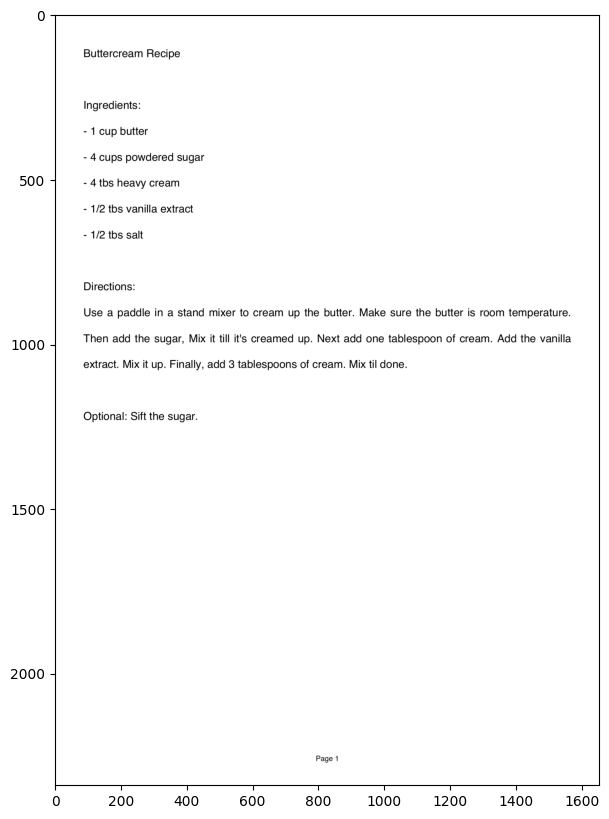

In [47]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import numpy as np

pdf_path = 'recipe_cookbook.pdf'

images = convert_from_path(pdf_path)

print (images)

image_arrays = [np.array(image) for image in images]

print (image_arrays[0].shape)

plt.figure(figsize=(10, 10))
plt.imshow(image_arrays[0])
plt.show()
